# CBOW Model


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/nlp/'

Reading Sentences from JSON File and splitting to tokens

In [25]:
f = open(root_path+"reviews_Electronics_5.json",)
u=50000
sentences=""
while u>0:
  line= f.readline()
  dic=eval(line)
  sentences+=dic['reviewText'].lower()

  u=u-1
# print(sentences)
sentences=sentences.split()
# print(sentences)

Removing Numericals and stopwords and blank tokens

In [26]:
import string
from collections import defaultdict 
import numpy as np
from spacy.lang.en.stop_words import STOP_WORDS
table = str.maketrans('', '', string.punctuation)
corpus = [w.translate(table) for w in sentences]
def hasNumbers(inputString):
  return any(char.isdigit() for char in inputString)
for i in corpus:
  if hasNumbers(i):
    corpus.remove(i)
  elif i in STOP_WORDS:
    corpus.remove(i)
  elif i == "":
    corpus.remove(i)
# print(corpus)
print("Total words: {}".format(len(corpus)))
print("Unique words: {}".format(len(set(corpus))))

Total words: 54200
Unique words: 7399


# Subsampling

In [27]:
c=defaultdict(int)
for i in corpus:
  c[i] +=1

def subsampling(corpus):
  new_corpus=[]
  for w in corpus:
    cnt=c[w]
    freq=cnt/len(corpus)
    prob = (np.sqrt(freq/0.001) + 1) * (0.001/freq)
    if np.random.random() < prob:   #generates random number (0,1)
      new_corpus.append(w)
  return new_corpus

corpus=subsampling(corpus)
# print(corpus)
print("Total words: {}".format(len(corpus)))
print("Unique words: {}".format(len(set(corpus))))

Total words: 46920
Unique words: 7399


In [28]:
c3=defaultdict(int)
for i in corpus:
  c3[i] +=1
print(c3)

defaultdict(<class 'int'>, {'got': 77, 'gps': 24, 'husband': 16, 'otr': 2, 'road': 11, 'trucker': 3, 'impressed': 11, 'shipping': 12, 'time': 142, 'arrived': 9, 'days': 44, 'earlier': 8, 'expected': 20, 'week': 27, 'use': 165, 'started': 17, 'freezing': 3, 'glitch': 2, 'unit': 85, 'worked': 34, 'great': 164, 'work': 88, 'normal': 12, 'person': 18, 'option': 40, 'big': 48, 'truck': 24, 'routes': 6, 'tells': 2, 'scale': 3, 'coming': 14, 'ect': 1, 'love': 96, 'bigger': 11, 'screen': 188, 'ease': 18, 'putting': 15, 'addresses': 3, 'memory': 29, 'bad': 38, 'exception': 1, 'probably': 19, 'million': 3, 'thats': 42, 'luck': 5, 'contacted': 3, 'seller': 7, 'minutes': 28, 'email': 68, 'received': 17, 'instructions': 31, 'exchange': 4, 'way': 89, 'aroundim': 1, 'professional': 5, 'driver': 6, 'bought': 133, 'tnd': 12, 'stop': 9, 'hoping': 5, 'life': 68, 'easier': 25, 'rand': 8, 'mcnally': 7, 'listeningfirst': 1, 'thing': 84, 'charging': 17, 'connect': 15, 'laptop': 26, 'install': 74, 'software':

Removing Less Frequent words

In [29]:
for i in corpus:
  if c[i] < 8:
    corpus.remove(i)

c=defaultdict(int)
for i in corpus:
  c[i] +=1
# print(c)
c1=sorted(c.keys())
vocab = defaultdict(int)
for i in range(len(c1)): 
  vocab[c1[i]]=i
print("Total words: {}".format(len(corpus)))
print("Unique words: {}".format(len(set(corpus))))
V=len(vocab)
# print(vocab)


Total words: 38176
Unique words: 3020


# One Hot encoding of context and centerwords


In [30]:
x_train=[]
y_train=[]
window_size=2
for i in range(len(corpus)):
  w1=[0 for x in range(V)]
  w1[vocab[corpus[i]]]=1
  ww=[]
  for j in range(i-window_size,i+window_size+1):
    if i!=j and j>=0 and j<len(corpus):
      w2=[0 for x in range(V)]
      w2[vocab[corpus[j]]]=1
      ww.append(w2)
  x_train.append(w1)
  y_train.append(ww)

# print(len(y_train[4]))
# print(len(y_train[4][1]))
# print(np.mean(y_train[4], axis=0))

# Softmax Formula

In [31]:
def softmax(x):
	e_x = np.exp(x - np.max(x)) 
	return e_x / e_x.sum() 

# My CBOW network and training Data

In [32]:
epochs=4
N=20
alpha=0.005
W = np.random.uniform(-0.8, 0.8, (V, N))
W1 = np.random.uniform(-0.8, 0.8, (N, V))
# print(W.shape)

for epoch in range(1,epochs):
  loss=0
  for j in range(len(x_train)):
    if(j%4000==0):
      print(j)
    #forward
    x = np.mean(y_train[j], axis=0)
    h = np.dot(W.T, x)
    # print(h.shape)
    u = np.dot(W1.T, h)
    # print(u.shape)
    y_pred = softmax(u)
    # print(y_pred.shape)
    #backprop
    e = y_pred - x_train[j]
    dW1 = np.outer(h, e)
    dW = np.outer(x, np.dot(W1, e))
    W = W - alpha * dW
    W1 = W1 - alpha * dW1
    for m in x_train[j]:
      if(x_train[j][m]):
        loss += -float(u[m])
    loss += np.log(np.sum(np.exp(u)))
  print("epoch ",epoch, " loss = ",loss)






0
4000
8000
12000
16000
20000
24000
28000
32000
36000
epoch  1  loss =  315280.2676415558
0
4000
8000
12000
16000
20000
24000
28000
32000
36000
epoch  2  loss =  314716.3297982276
0
4000
8000
12000
16000
20000
24000
28000
32000
36000
epoch  3  loss =  314891.42995073664


# Context Closest Neighbours and TSNE

In [ ]:
neighbours=10
wrd=["home","gps","width","i"]
wrd_v=[]
target_vectors=[]
word_vector=[]
# if wrd in corpus:
X = [0 for i in range(V)] 
for hj in wrd:
  X[vocab[hj]] = 1
# X=Xlen(wrd)
X = np.divide(X, len(wrd)) 
h = np.dot(W.T,X).reshape(N,1) 
wrd_v=h
u = np.dot(W1.T,h) 
y = softmax(u)
output = {} 
for i in range(V): 
  output[y[i][0]] = i 
# print(output)
# print(sorted(output,reverse=True))
top_context_words = [] 
for k in sorted(output,reverse=True):
  # print("k",k)
  # print(output[k])
  wrd2=corpus[output[k]]
  # print(wrd2)
  y = [0 for i in range(V)] 
  y[vocab[wrd2]] = 1
  h1 = np.dot(W.T,y).reshape(N,1)
  target_vectors.append(h1)
  top_context_words.append(corpus[output[k]]) 
  if(len(top_context_words)>=neighbours): 
    break
print("The words closest to set of words:")
print(top_context_words) 
# else: 
  # print("Word not found in dicitonary") 

from numpy import dot
from numpy.linalg import norm

def cos(a,b):
  return dot(a, b)/(norm(a)*norm(b))

def flat(l):
  flat_list = []
  for sublist in l:
    for item in sublist:
      flat_list.append(item)
  return flat_list

# TSNE

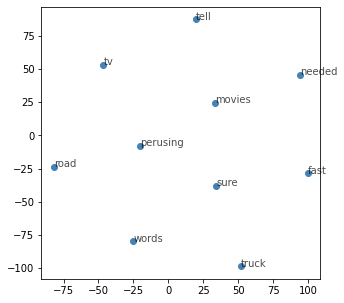

In [34]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE()
tv=[]
for i in target_vectors:
  tv.append(flat(i))
embed_tsne = tsne.fit_transform(tv)

fig, ax = plt.subplots(figsize=(5, 5))
for idx in range(len(target_vectors)):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(top_context_words[idx], (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)

# Gensim Comparison

In [35]:
from gensim.models import Word2Vec
import gensim.downloader as api
corpus = api.load('text8')
model = Word2Vec(corpus)

gensim_vec= model.wv[wrd[0]]
for i in range(1,len(wrd)):
  # print(wrd[i])
  gensim_vec = np.add(gensim_vec,  model.wv[wrd[i]])  

print("The Mean Error between Gensim Embedding and My Embedding for The word",wrd)
print((np.square(gensim_vec - wrd_v)).mean())

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


The Mean Error between Gensim Embedding and My Embedding for The word ['home', 'gps', 'width', 'i']
7.52884885375234
